# IRIS Flower Classification

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
iris = pd.read_csv("IRIS.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.shape

(150, 5)

In [14]:
# to display the number of samples in each class
iris['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

## Now we perform EDA

<AxesSubplot:>

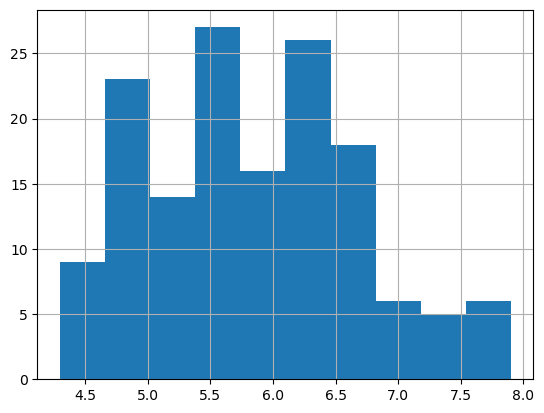

In [15]:
iris['sepal_length'].hist()

The above histogram gives us the values of the species on the X-axis and the corrosponding count on the Y-axis

<AxesSubplot:>

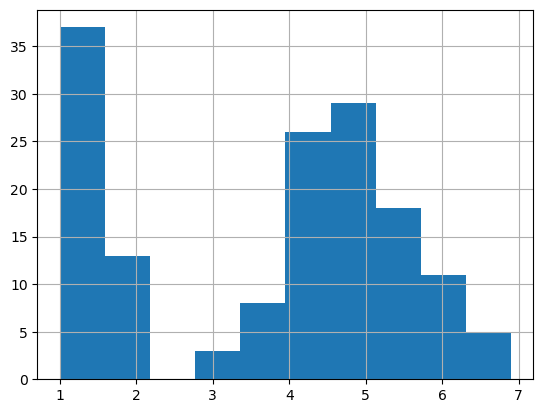

In [16]:
iris['petal_length'].hist()

<AxesSubplot:>

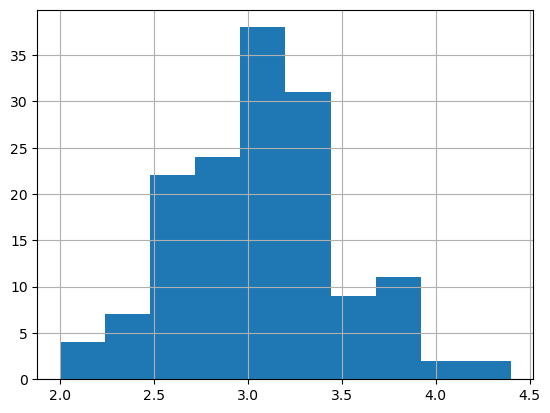

In [18]:
iris['sepal_width'].hist()

In the above histogram, we see the pattern of normal distribution in the columns. This can help us learn that the model can quickly learn from the data since we prefer the data to be in the normal distribution

<AxesSubplot:>

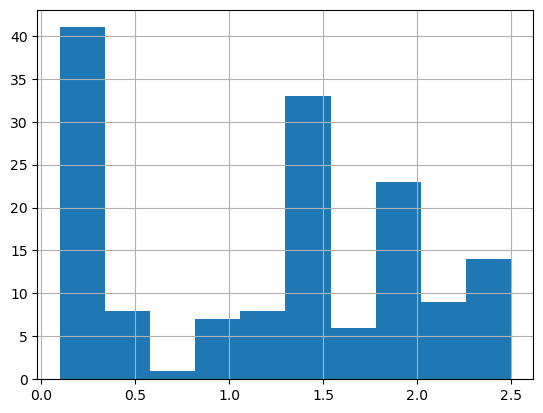

In [28]:
iris['petal_width'].hist()

In [19]:
# Scatter Plot 
colors = ['blue','green','red']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

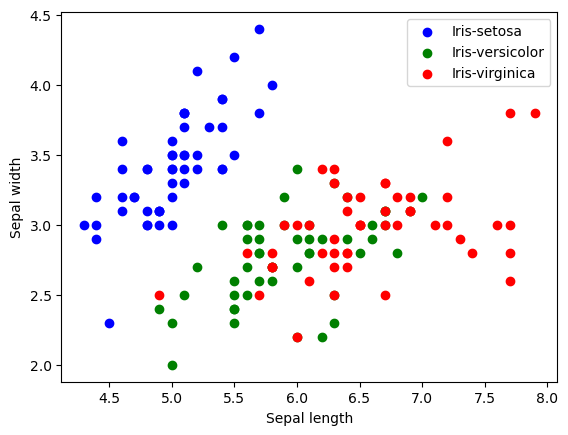

In [25]:
for i in range(3):
    x = iris[iris['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i], label=species[i])
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.legend()

The above scatter plot visually depicts that the class Iris-setosa is seperated from the other two classes of species 

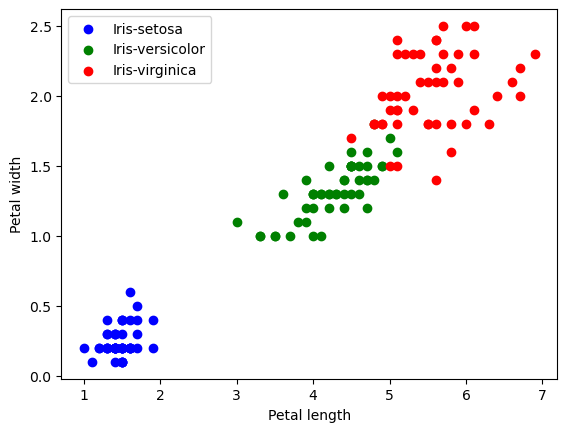

In [23]:
for i in range(3):
    x = iris[iris['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i], label=species[i])
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()

In the above plotted scatter plot for petals, we also get the same conclusion that the class Iris-setosa is seperated form the other two casses of species. ALso after analysing the below plotted scatter plots, we can clearly guess that Petal length and Petal width are the best attributes for the classification of the species when compared to other combinations of attribues.

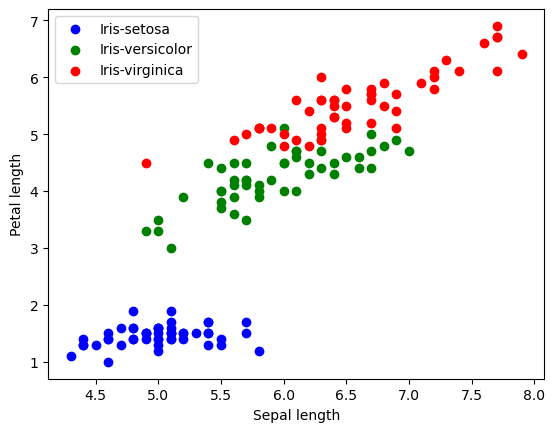

In [24]:
for i in range(3):
    x = iris[iris['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i], label=species[i])
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.legend()

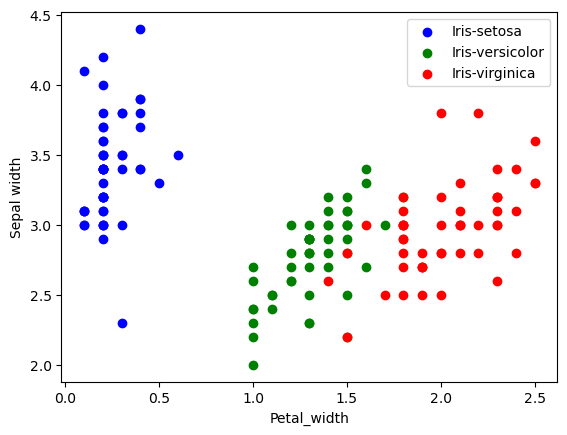

In [27]:
for i in range(3):
    x = iris[iris['species']==species[i]]
    plt.scatter(x['petal_width'],x['sepal_width'],c=colors[i], label=species[i])
plt.xlabel("Petal_width")
plt.ylabel("Sepal width")
plt.legend()

## Correlation Matrix

In [29]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


To efficiently understand the correlation matrix, we can visualize it in the form of heat-map.

<AxesSubplot:>

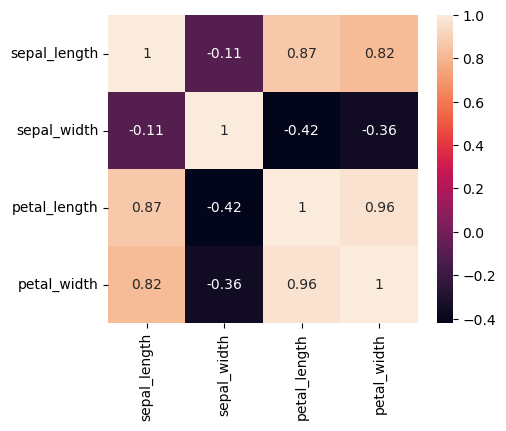

In [37]:
iris_corr = iris.corr()
fig,ax = plt.subplots(figsize = (5,4))
sns.heatmap(iris_corr,annot=True,ax = ax)

The heatmap plotted makes it easier to visualize the correlation between attributes.

## Label Encoder :
Refer to converting the labels in the dataset into a numeric form to the macine-readable format, becaue dataset may contain multiple labels in one or more than one columns.

In [41]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [42]:
iris['species']= le.fit_transform(iris['species'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## ML Model Training
We split the data in th ratio of  70:30

In [65]:

X=iris[['sepal_length','sepal_width','petal_length','petal_width']].values
Y=iris['species'].values


In [66]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [67]:
model.fit(X,Y)

LogisticRegression()

In [69]:
# Accuracy
model.score(X,Y)

0.9733333333333334

The accuracy score helps us to understand how well the model performs on unseen data. A high accuracy score suggests that the logistic regression model is effective in classifying iris flowers based on the provided features.

  Make predictions

In [70]:
expected = Y
predicted = model.predict(X)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [71]:
from sklearn import metrics

In [73]:
print(metrics.classification_report(expected,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



Better way to measue Accuracy. While looking at it, we conclude that for 0 i.e. iris-setosa, we get an accuracy of 100% as precision,recall and f1-scorein 1.00

In [74]:
print(metrics.confusion_matrix(expected,predicted))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


The confusion matrix provides insights into the types of errors made by the model, such as wrongly classifying a flower from one species as another.

## Conclusion :
We had 50 classes of the species in total, out of which 50 were predicted correctly iris-setosa and iris-verginica whereas very bad prediction for iris-versicolor